In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from a CSV file
data = pd.read_csv('water_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Mean of 'ph': 7.080794504276835
95% Confidence Interval for 'ph': nan - nan


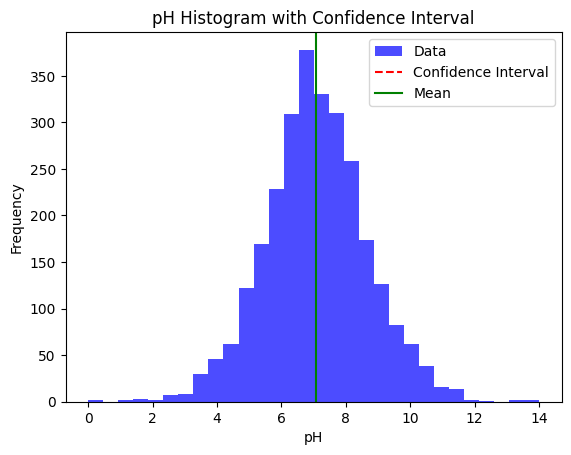

In [4]:
# Function to calculate the mean of a sample
def calculate_mean(sample):
    return np.mean(sample)

# Function to generate bootstrap samples
def generate_bootstrap_samples(data, num_samples):
    n = len(data)
    bootstrap_samples = [np.random.choice(data, n) for _ in range(num_samples)]
    return bootstrap_samples

# Function to calculate confidence interval using bootstrapping
def calculate_bootstrap_confidence_interval(data, num_samples, alpha):
    bootstrap_samples = generate_bootstrap_samples(data, num_samples)
    bootstrap_means = [calculate_mean(sample) for sample in bootstrap_samples]
    lower_limit = np.percentile(bootstrap_means, (alpha / 2) * 100)
    upper_limit = np.percentile(bootstrap_means, (1 - alpha / 2) * 100)
    return lower_limit, upper_limit

# Calculate 95% confidence interval for the mean of ph
# alpha = 1 - confidence level
lower_limit, upper_limit = calculate_bootstrap_confidence_interval(data['ph'], num_samples=1000, alpha=0.05)
mean_ph = calculate_mean(data['ph'])

print("Mean of 'ph':", mean_ph)
print("95% Confidence Interval for 'ph':", lower_limit, "-", upper_limit)

# Visualization
plt.hist(data['ph'], bins=30, alpha=0.7, color='blue', label='Data')
plt.axvline(lower_limit, color='red', linestyle='--', label='Confidence Interval')
plt.axvline(upper_limit, color='red', linestyle='--')
plt.axvline(mean_ph, color='green', linestyle='-', label='Mean')
plt.legend()
plt.title('pH Histogram with Confidence Interval')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

La técnica de bootstrapping es útil en términos estadísticos porque nos permite estimar la distribución de una estadística de interés (como la media) sin asumir ninguna distribución específica para los datos. Esto puede ser especialmente útil cuando los datos no siguen una distribución conocida o cuando el tamaño de la muestra es pequeño. El intervalo de confianza resultante nos proporciona una estimación de la incertidumbre asociada con nuestra estimación de la media.
En el ejercicio pudimos estimar la media del pH en la población: 7.08 y de igual manera, graficar esto nos permitió visualizar una gráfica con una distribución normal con un ligero sesgo positivo marcado por la frecuencia.